In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [6]:
df.shape

(545, 13)

In [7]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [8]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder

# Perform Label Encoding on any columns that may be categorical
label_encoder = LabelEncoder()

# Encoding columns that are more likely to be categorical
# Assuming 'cp', 'restecg', 'slope', 'ca', and 'thal' could be categorical
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Apply label encoding
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows after encoding
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [10]:
df.head(10).sum()

price               112245000
area                    87390
bedrooms                   38
bathrooms                  23
stories                    26
mainroad                   10
guestroom                   3
basement                    5
hotwaterheating             0
airconditioning             8
parking                    19
prefarea                    7
furnishingstatus            7
dtype: int64

In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have loaded your dataset into a pandas DataFrame named 'dataset'
# Splitting the dataset into features (X) and target variable (y)
X = df[['area', 'bedrooms', 'stories', 'bedrooms', 'bathrooms', 'parking']]  # Independent variables
y = df['price']  # Dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the MLR model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2044165115591.7866


In [14]:
from sklearn import metrics

In [15]:
metrics.mean_absolute_error(y_test,y_pred)

np.float64(1065137.8263727794)

In [16]:
metrics.mean_squared_error(y_test, y_pred)

np.float64(2044165115591.7866)

In [17]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

np.float64(1429743.0243200304)

In [18]:
from sklearn.linear_model import LinearRegression
#create an instance of the Linear Regression Python object
lmodel=LinearRegression()
lmodel.fit(X_train, y_train)
lmodel.intercept_

np.float64(-17122.99514249619)

In [19]:
lmodel.coef_

array([3.29285878e+02, 8.05387393e+04, 4.72530548e+05, 8.05387393e+04,
       1.19412059e+06, 3.95480372e+05])

In [20]:
y_pred

array([6298756.2484602 , 6412300.47281582, 3301998.047474  ,
       4251720.51644364, 3436732.65583284, 4345561.67801564,
       5729237.00078622, 5603625.72829888, 3434049.7169351 ,
       3021832.45005373, 9715904.4598506 , 3267093.74444814,
       3196626.56664121, 3626077.34899896, 3912556.0625131 ,
       6188840.04825674, 3102785.40506922, 4976486.76558918,
       4927093.88394881, 3947398.36757483, 5203367.32980418,
       4380136.6951639 , 3173247.26933144, 4252057.83486375,
       6035810.18537663, 7870059.80450225, 2989176.46375166,
       4787269.35330295, 7742825.45587   , 3432071.28267168,
       5116555.23090541, 4028143.43809408, 6247657.53401458,
       4783517.20877162, 4338708.67255012, 5709607.12900996,
       4926114.05885851, 3813497.69777419, 3278675.43458365,
       4878208.93994065, 5551422.62688089, 3166990.83765699,
       6385957.60260762, 4383772.18590474, 4194362.77577668,
       4305010.86319362, 6720188.08191883, 4689735.45061686,
       4622434.41665989,

In [21]:
new_data=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [22]:
new_data

,Actual,Predicted
316,4060000,6.298756e+06
77,6650000,6.412300e+06
360,3710000,3.301998e+06
90,6440000,4.251721e+06
493,2800000,3.436733e+06
...,...,...
395,3500000,4.669433e+06
425,3360000,3.811419e+06
195,4970000,7.397721e+06
452,3150000,6.359825e+06


In [23]:
from sklearn.metrics import mean_absolute_error
# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(df, drop_first=True)

# Split the encoded data into training and testing sets (70% training, 30% testing)
train_data_encoded, test_data_encoded = train_test_split(data_encoded, test_size=0.3, random_state=0)

# Separate features and target variable
X_train = train_data_encoded.drop(columns=["price"])
y_train = train_data_encoded["price"]
X_test = test_data_encoded.drop(columns=["price"])
y_test = test_data_encoded["price"]

# Train the Linear Regression model on the encoded data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse


(np.float64(733152.2053964165), np.float64(979342.0642354131))

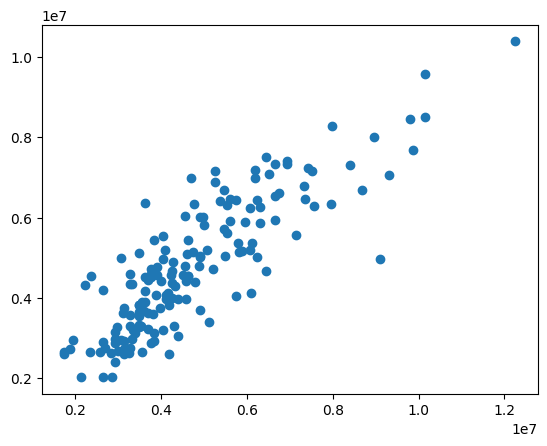

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.scatter(y_test,y_pred)

In [25]:
 #Make a correlation matrix
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


(13.5, -0.5)

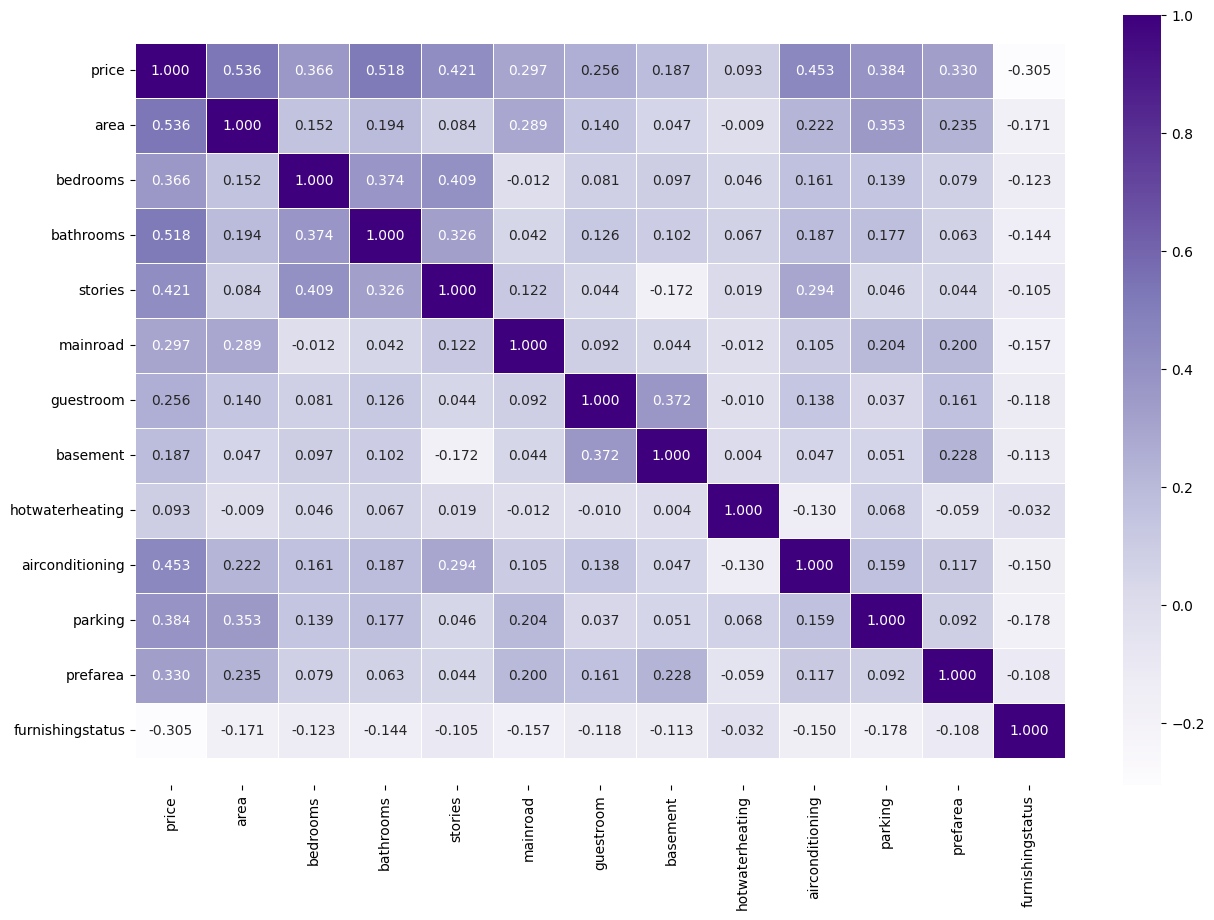

In [26]:
#Visualise correlation
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".3f",cmap="Purples");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

In [27]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [28]:
mape

np.float64(16.595978307702673)

In [30]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [31]:
df2=df.copy()

In [32]:
df2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [34]:
df2.iloc[:, 1]

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

In [35]:
df2.iloc[:,1].replace(0,np.nan)

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

In [36]:
df2.iloc[:, 1].replace(0, np.nan, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3980\3820242924.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2.iloc[:, 1].replace(0, np.nan, inplace=True)


In [37]:
df2['area'].isnull().sum()

np.int64(0)

In [49]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
454,4500,3,1,2,1,0,0,0,1,0,0,2
392,3990,3,1,2,1,0,0,0,0,0,0,1
231,4320,3,1,1,1,0,0,0,0,0,1,1
271,1905,5,1,2,0,0,1,0,0,0,0,1
250,3510,3,1,3,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
70,4000,3,2,2,1,0,1,0,1,0,1,1
277,10360,2,1,1,1,0,0,0,0,1,1,1
9,5750,3,2,4,1,1,0,0,1,1,1,2
359,3600,3,1,1,1,0,0,0,0,1,0,2


In [50]:
y_train

454    3143000
392    3500000
231    4690000
271    4340000
250    4515000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 381, dtype: int64

In [51]:
from sklearn.linear_model import LogisticRegression

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [58]:
y_pred

array([ 4000083.45776846,  6258809.73144952,  4425142.15147462,
        7268106.11644597,  2909698.10588928,  6968133.59281851,
        3304984.91027558,  3183400.62818004,  3540204.46459515,
        8280555.28412366,  6612762.80414792,  3763489.44542049,
        3763711.79672228,  4592716.44085378,  3977802.73076233,
        2041586.58112109,  3987157.10045339,  3626886.59786116,
        3221361.75782729,  4670704.17145444,  5826510.20816188,
        6334280.43222014,  4671120.2066206 ,  2734125.16718307,
        5382107.59884269,  5685484.83933928,  5371085.37446242,
        5432312.60825468,  5610765.47819828,  5883509.55168731,
        3308294.17060422,  6260624.2877033 ,  7153794.19580335,
        2986392.23803494,  4391528.82472396,  5151218.67565096,
        4994881.02375696,  3660061.14021388,  2936057.57401836,
        4001392.93680535,  8015790.97386594,  4999075.71152473,
        6423107.6652731 ,  3623353.4905938 ,  3908369.18994851,
        6284369.80895941,  4532506.39559

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate regression accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 729242.196937432
Mean Squared Error (MSE): 949862092877.93
Root Mean Squared Error (RMSE): 974608.6870523626
R-squared (R²): 0.7261678201163899


In [63]:
#mean_absolute_percentage_error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [64]:
mape

np.float64(16.504242498264475)